In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gymnasium as gym
from sbx import PPO, DDPG
from stable_baselines3.common.env_util import make_vec_env
from portfolio_env import BasicEnv, AbstractPortfolioEnv, MPT
import pandas_ta as ta
from tensorly.decomposition import Tucker
import torch
import jax
import jax.numpy as jnp
from functools import partial
import warnings
warnings.filterwarnings("ignore")

# Basic Env + PPO

In [4]:
# Parallel environments
vec_env = make_vec_env(BasicEnv, n_envs=4)

model = PPO("MlpPolicy", vec_env, verbose=1, seed=1)
model.learn(total_timesteps=100_000)
model.save("basic_portfolio_rl_model")

KeyboardInterrupt: 

In [ ]:
env = BasicEnv(start_year=2020, end_year=2024)
obs, _ = env.reset()

port_val = [1.0]
snp_val = [1.0]
actions = []

for i in range(900):
    action, _ = model.predict(obs, deterministic=True)
    actions.append(action)
    obs, rewards, terminated, truncated, info = env.step(action)
    port_val.append(info['port_val'])
    snp_val.append(snp_val[-1] * (1 + env.idx_df[env.idx_df.index == env.times[env.t]].vwretd.values[0]))
    if terminated:
        break

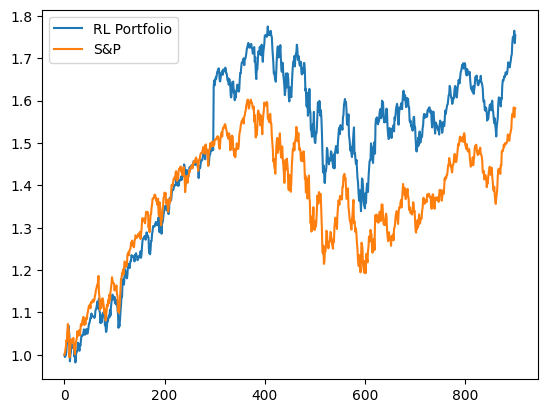

In [ ]:
plt.plot(np.array(port_val), label='RL Portfolio')
plt.plot(np.array(snp_val), label='S&P')
# plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
np.argmax(np.max(env.ret, axis=0))

35

In [ ]:
env.tickers[35]

'WFC'

In [ ]:
np.stack(actions)[:, 35].argmax()

2

# Basic Env + DDPG

In [ ]:
# Parallel environments
vec_env = make_vec_env(BasicEnv, n_envs=4)

model = DDPG("MlpPolicy", vec_env, verbose=1, seed=1)
model.learn(total_timesteps=100_000)
model.save("basic_ddpg_model")

Using cpu device


/Users/jameszhang/miniconda3/envs/rl/lib/python3.9/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 69.03GB > 6.09GB
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.42e+03 |
|    ep_rew_mean     | 40.1     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 76       |
|    time_elapsed    | 125      |
|    total_timesteps | 9660     |
| train/             |          |
|    actor_loss      | -6.71    |
|    critic_loss     | 0.0103   |
|    n_updates       | 2389     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.42e+03 |
|    ep_rew_mean     | 40.3     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 79       |
|    time_elapsed    | 243      |
|    total_timesteps | 19320    |
| train/             |          |
|    actor_loss      | -12.1    |
|    critic_loss     | 0.0218   |
|    n_updates       | 4804     |
---------------------------------
---------------------------------
| rollout/    

In [ ]:
env = BasicEnv(start_year=2020, end_year=2024)
obs, _ = env.reset()

port_val = [1.0]
snp_val = [1.0]
actions = []

for i in range(900):
    action, _ = model.predict(obs, deterministic=True)
    actions.append(action)
    obs, rewards, terminated, truncated, info = env.step(action)
    port_val.append(info['port_val'])
    snp_val.append(snp_val[-1] * (1 + env.idx_df[env.idx_df.index == env.times[env.t]].vwretd.values[0]))
    if terminated:
        break

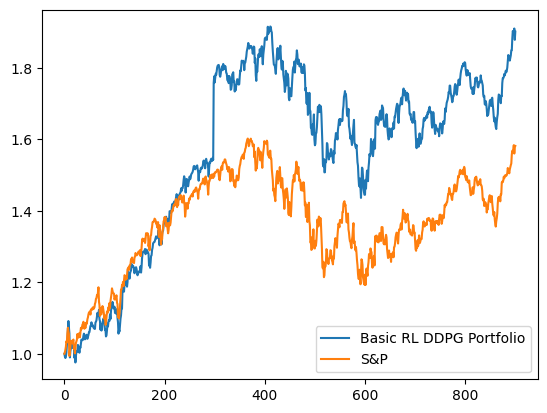

In [ ]:
plt.plot(np.array(port_val), label='Basic RL DDPG Portfolio')
plt.plot(np.array(snp_val), label='S&P')
# plt.yscale('log')
plt.legend()
plt.show()

# MPT + PPO

In [2]:
# Parallel environments
vec_env = make_vec_env(MPT, n_envs=1)

model = PPO("MlpPolicy", vec_env, verbose=1, seed=1)
model.learn(total_timesteps=2000)
model.save("MPT_model")

Using cpu device


KeyboardInterrupt: 

In [ ]:
env = MPT(start_year=2020, end_year=2024)
obs, _ = env.reset()

port_val = [1.0]
snp_val = [1.0]
actions = []

for i in range(900):
    action, _ = model.predict(obs, deterministic=True)
    actions.append(action)
    obs, rewards, terminated, truncated, info = env.step(action)
    port_val.append(info['port_val'])
    snp_val.append(snp_val[-1] * (1 + env.idx_df[env.idx_df.index == env.times[env.t]].vwretd.values[0]))
    if terminated:
        break

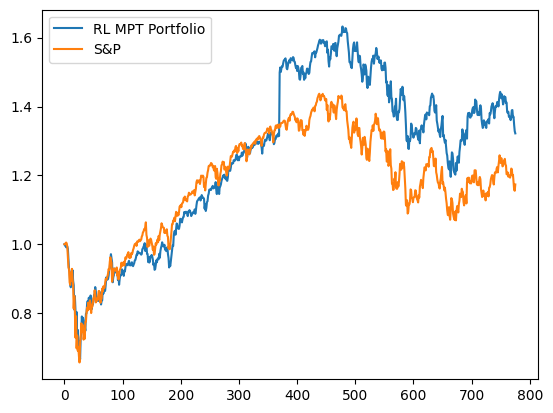

In [ ]:
plt.plot(np.array(port_val), label='RL MPT Portfolio')
plt.plot(np.array(snp_val), label='S&P')
# plt.yscale('log')
plt.legend()
plt.show()